# **Optimal control of hut temperature**

This document is only the code part. The most interesting part is the contextualization and the equations in the associated pdf.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def system(t, vars):
    x, y = vars
    dxdt = 3.2e-5 * y - 4e-3 * (x - 290 + 10 * np.cos(0.00007 * t))
    dydt = - x + 293 + 4e-3 * y
    return np.array([dxdt, dydt])

def runge_kutta(f, t0, tf, x0, y0, dt):
    n_steps = int((tf - t0) / dt)
    t_values = np.linspace(t0, tf, n_steps + 1)
    x_values = np.zeros(n_steps + 1)
    y_values = np.zeros(n_steps + 1)

    x_values[0] = x0
    y_values[0] = y0

    for i in range(n_steps):
        t = t_values[i]
        vars = np.array([x_values[i], y_values[i]])

        k1 = dt * f(t, vars)
        k2 = dt * f(t + dt/2, vars + k1/2)
        k3 = dt * f(t + dt/2, vars + k2/2)
        k4 = dt * f(t + dt, vars + k3)

        vars_next = vars + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_values[i + 1] = vars_next[0]
        y_values[i + 1] = vars_next[1]

    return t_values, x_values, y_values

t0 = 0
tf = 250200
dt = 1
x0 = 280
y0 = 0

# Solve the system using Runge-Kutta
t_values, x_values, y_values = runge_kutta(system, t0, tf, x0, y0, dt)


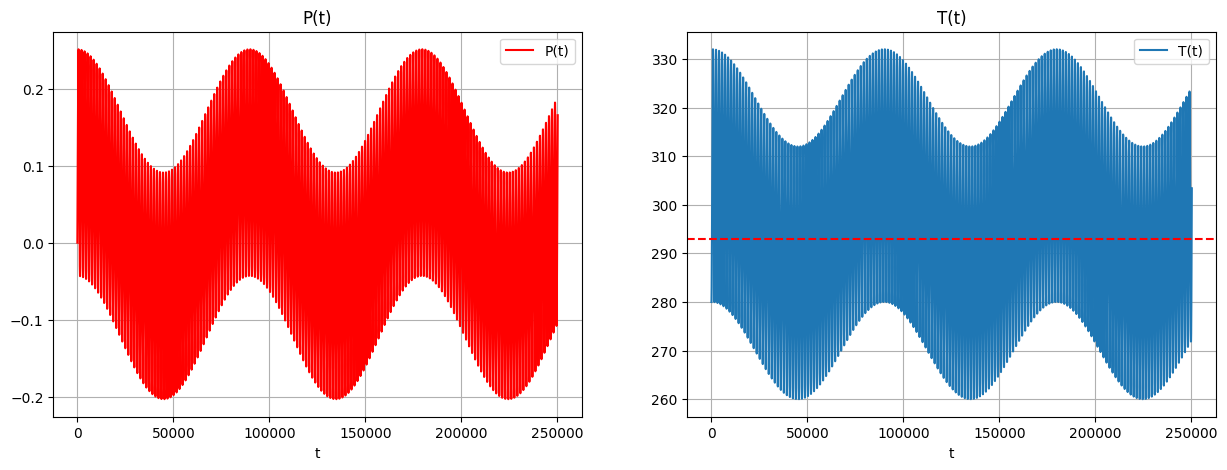

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot on the first subplot with y(t) scaled
ax1.plot(t_values, [y * 3.2e-5 for y in y_values], label='P(t)',color="red")
ax1.set_xlabel('t')
ax1.set_title('P(t)')
ax1.legend()
ax1.grid()

ax2.plot(t_values, x_values, label='T(t)')
ax2.axhline(y=293, color='red', linestyle='--')
ax2.set_xlabel('t')
ax2.set_title('T(t)')
ax2.legend()
ax2.grid()

plt.show()